In [1]:
# Relação hipsometrica - Gabriel Bueno

# 1 Teste de normalidade
# 2 Histograma da frequência dos dados
# 3 Ajuste dos Modelos
# 3.1 Reta
# 3.2 Parabola
# 3.3 Curtis
# 3.4 Stofells
# 3.5 Hericksen
# 3.6 Gompertz
# 3.7 Logistica
# 3.8 Champman and Richards
# 4 Predição da altura com os modelos
# 5 Tendência dos modelos
# 6 Gráfico de resíduos
# 7 Estatísticas de qualidade dos modelos

In [2]:
# Importando as bibliotecas necessárias

import pandas as pd # leitura e manipulação dos dados
import numpy as np # operações matemáticas
import matplotlib.pyplot as plt # plotar gráficos
from scipy import stats # teste de normalidade
import math # realização de operações matemáticas
import statsmodels.api as sm # ajuste dos modelos - MQO
import matplotlib.pyplot as plt # gerar gráficos
import matplotlib.lines as mlines # criar linha nos gráfico
from scipy.optimize import curve_fit # ajuste dos modelos não lineares
import xlsxwriter # exportar dataframe para excel

In [3]:
# Realizando leitura e visualição dos dados

#obs: Planilha deve ser do tipo csv
dados = pd.read_csv('dados.csv', encoding='iso-8859-1', delimiter=";")
dados

,arvore,dap,altura
0,1,14.5,21.2
1,2,11.2,19.0
2,3,14.1,18.5
3,4,13.6,19.7
4,5,8.1,12.4
5,6,7.9,13.4
6,7,11.2,18.6
7,8,8.0,16.9
8,9,11.5,17.6
9,10,11.1,19.4


In [4]:
# Criando as váriavel depedente e indepedente do modelo

altura = dados['altura'] # váriavel dependente
dap = dados['dap'] # váriavel independente

In [5]:
# Realizando tesde de Shapiro-Wilk para verificar normalidade dos dados
shapiro = stats.shapiro(altura)

# Informando a normalidade ou não normalidade dos dados
# Perguntando ao usuário se mesmo que não haja normalidade deva continuar
if shapiro[1] > 0.05:
    print('Os dados seguem uma distribuicao normal.')
    print(f'P valor = {round(shapiro[1],5)}.\nIniciando processamento...')
else:
    pergunta = input('Os dados não seguem uma distribuicao normal, desejar continuar? [sim/não]')
    if pergunta == 'sim':
        print('Iniciando processamento...')
    else:
        print('encerrando')
        while True:
            break

Os dados seguem uma distribuicao normal.
P valor = 0.43594.
Iniciando processamento...


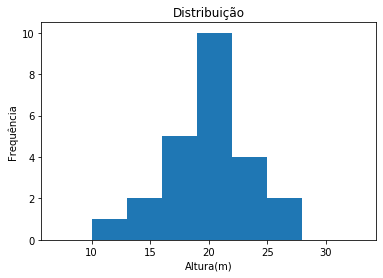

In [6]:
# Gerando diagrama com a distribuição dos dados
plt.hist(altura, bins=[7, 10, 13, 16, 19, 22, 25, 28,31,33])
plt.title('Distribuição')
plt.xlabel('Altura(m)')
plt.ylabel('Frequência')
plt.savefig('histograma.png')

In [7]:
# Ajustando os dados para iniciar o ajuste pelo metódo MQO

# função para realizar logaratimo em todo conjunto de dados
def logaritmo(coluna):
    ln = []
    for i in coluna:
        x = math.log(i)
        ln.append(x)
    return ln

# Reta
xreta = dap
yreta = altura

# Parabola
dados['dap2'] = dap**2
xparabola = dados[['dap','dap2']]
yparabola = altura

# Curtis
xcurtis = 1/dados['dap']
ycurtis = logaritmo(dados['altura'])

# Stofells
xstofells = logaritmo(dados['dap'])
ystofells = logaritmo(dados['altura'])

# Hericksen
xhericksen = logaritmo(dados['dap'])
yhericksen = dados['altura']

In [8]:
# Realizando ajuste dos modelos - MQO

# função para ajuste dos modelos
def ajuste(x,y):
    x1 = sm.add_constant(x)
    model_x = sm.OLS(y,x1)
    fit_x = model_x.fit()
    return fit_x


# ajuste dos modelos
modelo_reta = ajuste(xreta, yreta)
modelo_parabola = ajuste(xparabola, yparabola)
modelo_curtis = ajuste(xcurtis, ycurtis)
modelo_stofells = ajuste(xstofells, ystofells)
modelo_hericksen = ajuste(xhericksen, yhericksen)

In [9]:
# salvando os parametros
reta_param = list(modelo_reta.params)
parabola_param = list(modelo_parabola.params)
curtis_param = list(modelo_curtis.params)
stofells_param = list(modelo_stofells.params)
hericksen_param = list(modelo_hericksen.params)

In [10]:
#ajuste modelos não lineares

#Gompertz
xdados = np.array(dap)
ydados = np.array(altura)

# Definição do modelo
def func_gomp(x, p1,p2,p3):
  return p1*np.exp(-np.exp(p2-p3*xdados))

# Ajuste atraves da função curve_fit
popt, pcov = curve_fit(func_gomp, xdados, ydados, p0=(24.0,0.1,0.1))  
p1, p2, p3 = popt

# Salvando parâmetros
gomp_param = [p1,p2,p3]
gomp_param

[28.121630321677358, 0.50669429121227, 0.11823347951681443]

In [11]:
# logistico
# Definição do modelo
def func_log(x, p1,p2,p3):
  return p1/(1+p2*np.exp(-p3*xdados))

# Ajuste atraves da função curve_fit
popt, pcov = curve_fit(func_log, xdados, ydados, p0=(24.0,1,0.1))  
p1, p2, p3 = popt

# Salvando parâmetros
log_param = [p1,p2,p3]
log_param

[26.966033813069927, 2.9277395824128307, 0.1588174022192455]

In [12]:
# Champman and Richards
# Definição do modelo
def func_champ(x, p1,p2,p3):
  return p1*(1-np.exp(-p2*xdados))**p3


# Ajuste atraves da função curve_fit
popt, pcov = curve_fit(func_champ, xdados, ydados, p0=(24.0,0.1,1.0))  
p1, p2, p3 = popt

# Salvando parâmetros
champ_param = [p1,p2,p3]
champ_param

[31.635574648135066, 0.06443459810486399, 0.8383651968009219]

In [13]:
#criando tabela com os parametros de todos os modelos ajustados
betas = ['b0','b1','b2']
parametros = pd.concat([pd.DataFrame(betas),pd.DataFrame(reta_param),pd.DataFrame(curtis_param),
               pd.DataFrame(parabola_param),pd.DataFrame(stofells_param),
               pd.DataFrame(hericksen_param),pd.DataFrame(gomp_param),
               pd.DataFrame(log_param),pd.DataFrame(champ_param)],ignore_index=True, axis=1)
parametros.columns = ['Parametros/modelos','Reta','Curtis','Parabola','Stofells','Hericksen','Gompertz','Logistico','Champman and Richards']

parametros

,Parametros/modelos,Reta,Curtis,Parabola,Stofells,Hericksen,Gompertz,Logistico,Champman and Richards
0,b0,8.909517,3.498809,4.427983,1.545921,-6.727021,28.121630,26.966034,31.635575
1,b1,0.795085,-6.619884,1.506758,0.553125,10.304749,0.506694,2.927740,0.064435
2,b2,NaN,NaN,-0.026035,NaN,NaN,0.118233,0.158817,0.838365


In [14]:
# predição das alturas utilizando os modelos ajustados

# função para realizar exponencial
def exponencial(coluna):
    exp = []
    for i in coluna:
        x = math.exp(i)
        exp.append(x)
    return exp

pred_reta = modelo_reta.predict()
pred_curtis = exponencial(modelo_curtis.predict())
pred_parabola = modelo_parabola.predict()
pred_stofells = exponencial(modelo_stofells.predict())
pred_hericksen = modelo_hericksen.predict()

In [15]:
# função para predição da altura com modelo de gompertz
def gomp(dap):
    exp = []
    for i in dap:
        x = gomp_param[0]*np.exp(-np.exp(gomp_param[1]-gomp_param[2]*i))
        exp.append(x)
    return exp

pred_gomp = gomp(dap)
pred_gomp

[20.85622528372846,
 18.083755732855057,
 20.55650698181579,
 20.16793775930963,
 14.872981149369709,
 14.648001958693506,
 18.083755732855057,
 14.760727909236202,
 18.364151584540107,
 17.989041659063034,
 20.24689747626108,
 23.690548445475088,
 21.07459282098212,
 23.690548445475088,
 14.42116524532862,
 18.083755732855057,
 23.59354883392183,
 23.690548445475088,
 22.454550330421444,
 22.57295354233944,
 23.59354883392183,
 22.086103561591152,
 22.454550330421444,
 20.48003605931897]

In [16]:
# função para predição da altura com modelo logistico
def logis(dap):
    exp = []
    for i in dap:
        x = log_param[0]/(1+log_param[1]*np.exp(-log_param[2]*i))
        exp.append(x)
    return exp

pred_log = logis(dap)
pred_log

[20.86031014765997,
 18.04540267339466,
 20.555053943021775,
 20.158957465838512,
 14.90815644844545,
 14.69607684887887,
 18.04540267339466,
 14.80219903316826,
 18.327498124443412,
 17.95034163496073,
 20.239457560631475,
 23.680328859452214,
 21.082413332341922,
 23.680328859452214,
 14.483390364049063,
 18.04540267339466,
 23.587573620395652,
 23.680328859452214,
 22.472988815213856,
 22.59066857297874,
 23.587573620395652,
 22.104762150020335,
 22.472988815213856,
 20.477119840457362]

In [17]:
# função para predição da altura com modelo de champman and richards
def champ(dap):
    exp = []
    for i in dap:
        x = champ_param[0]*(1-np.exp(-champ_param[1]*i))**champ_param[2]
        exp.append(x)
    return exp

pred_champ = champ(dap)
pred_champ

[20.820567837114073,
 18.109183238960156,
 20.52527065270837,
 20.144072807280637,
 14.877609277655507,
 14.641164454649466,
 18.109183238960156,
 14.759859029878085,
 18.38354369004831,
 18.016364183870905,
 20.2214095927216,
 23.733799803937178,
 21.036586684930626,
 23.733799803937178,
 14.40089983959084,
 18.109183238960156,
 23.628233877023558,
 23.733799803937178,
 22.427152202978323,
 22.549224423236094,
 23.628233877023558,
 22.050543925336964,
 22.427152202978323,
 20.450119266472463]

In [18]:
# criação da nova tabela com os valores estimados de cada modelo
tabela_estimado = dados[['arvore','dap','altura']]

# inserção dos valores estimados na tabela
tabela_estimado.loc[:,'altura_reta'] = pred_reta
tabela_estimado.loc[:,'altura_curtis'] = pred_curtis
tabela_estimado.loc[:,'altura_parabola'] = pred_parabola
tabela_estimado.loc[:,'altura_stofells'] = pred_stofells
tabela_estimado.loc[:,'altura_hericksen'] = pred_hericksen
tabela_estimado.loc[:,'altura_gompertz'] = pred_gomp
tabela_estimado.loc[:,'altura_logistica'] = pred_log
tabela_estimado.loc[:,'altura_Chapman_richards'] = pred_champ

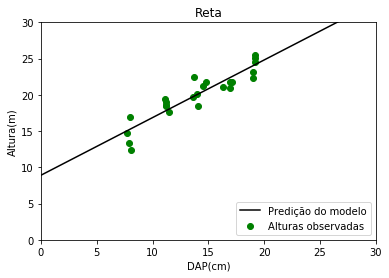

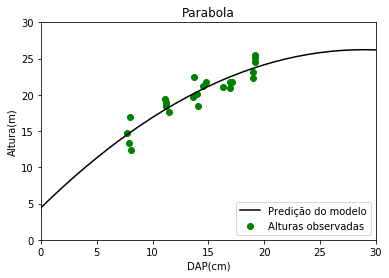

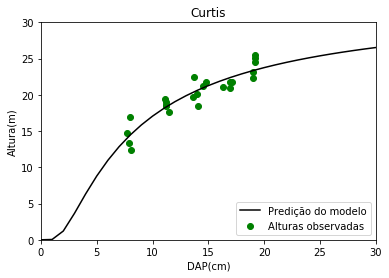

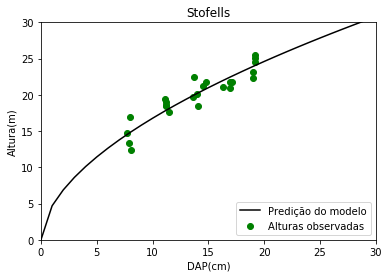

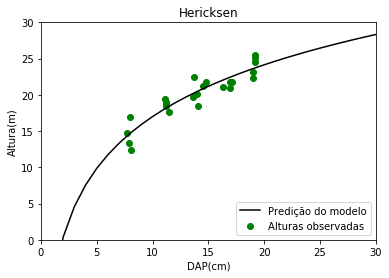

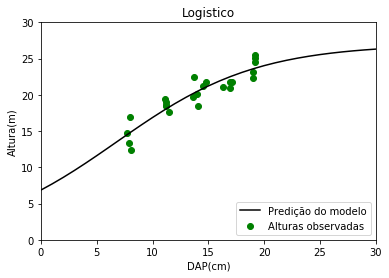

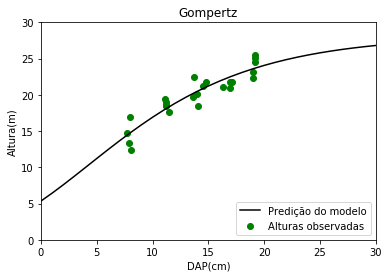

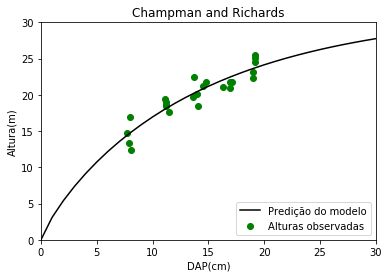

In [19]:
# tedência dos modelos

# função para plotar os gráficos de tendência dos modelos
def graf_tendencia(formula,modelo):
    np.seterr(divide = 'ignore')
    x_range= range(0,50)
    fig, ax = plt.subplots()
    ax.scatter(dap, altura, c='Green',label='Alturas observadas')
    plt.xlim(0, 30)
    plt.ylim(0, 30)
    x = np.array(x_range)
    y = eval(formula)
    plt.title(f'{modelo}')
    plt.xlabel('DAP(cm)')
    plt.ylabel('Altura(m)')
    plt.plot(x, y, c='black',label='Predição do modelo')
    ax.legend(loc='lower right')
    plt.savefig(f'{modelo}_tendencia.png')

#plotando e salvando os gráficos        
graf_tendencia(f'{reta_param[0]}+x*{reta_param[1]}','Reta')
graf_tendencia(f'{parabola_param[0]}+x*{parabola_param[1]}+(x**2)*{parabola_param[2]}','Parabola')
graf_tendencia(f'exponencial({curtis_param[0]}+{curtis_param[1]}/x)','Curtis')
graf_tendencia(f'exponencial({stofells_param[0]}+{stofells_param[1]}*np.log(x))','Stofells')
graf_tendencia(f'{hericksen_param[0]}+{hericksen_param[1]}*np.log(x)','Hericksen')
graf_tendencia(f'{log_param[0]}/(1+{log_param[1]}*np.exp(-{log_param[2]}*x))','Logistico')
graf_tendencia(f'{gomp_param[0]}*np.exp(-np.exp({gomp_param[1]}-{gomp_param[2]}*x))','Gompertz')
graf_tendencia(f'{champ_param[0]}*(1-np.exp(-{champ_param[1]}*x))**{champ_param[2]}','Champman and Richards')

In [20]:
# calculando resíduos dos modelos

resid_reta = pred_reta-altura
resid_parabola = pred_parabola-altura
resid_curtis = pred_curtis-altura
resid_stofells = pred_stofells-altura
resid_hericksen = pred_hericksen-altura
resid_gomp = pred_gomp-altura
resid_log = pred_log-altura
resid_champ = pred_champ-altura

In [21]:
# calculando resíduo em porcentagem

resid_reta100 = (pred_reta-altura)/altura*100
resid_parabola100 = (pred_parabola-altura)/altura*100
resid_curtis100 = (pred_curtis-altura)/altura*100
resid_stofells100 = (pred_stofells-altura)/altura*100
resid_hericksen100 = (pred_hericksen-altura)/altura*100
resid_gomp100 = (pred_gomp-altura)/altura*100
resid_log100 = (pred_log-altura)/altura*100
resid_champ100 = (pred_champ-altura)/altura*100

In [22]:
#criterios estatisticos

#função para calcular a soma de quadrado
def somaquad(item):           
    quad = []            
    for i in item:
        x = i**2
        quad.append(x)
    res = sum(quad)
    return res

#função para calcular erro padrão residual
def syx(residuo, n_param):
    result = (somaquad((residuo))/((len(residuo))-(n_param)))**0.5
    return result

#função para calcular erro padrão residual em porcentagem
def syx100(residuo,altura,n_param):
    syx1 = (somaquad((residuo))/((len(residuo))-(n_param)))**0.5
    syx100 = (syx1/np.mean(altura))*100
    return syx100

def resid_medio(altura):
    resid_med = np.mean(altura)
    resultado = []
    for i in altura:
        x = i - resid_med
        resultado.append(x)
    return resultado

residuo_medio = resid_medio(altura)

#função para calcular r2 ajustado
def r2_ajus(residuo,n_param):
    x = 1-((len(residuo)-1)/(len(residuo)-n_param))*somaquad(residuo)/somaquad(residuo_medio)
    return x

#função para calcular syx, syx(%), r2ajustado
def estat(residuo,altura,n_param):
    x = []
    a = syx(residuo,n_param)
    b = syx100(residuo,altura,n_param)
    c = r2_ajus(residuo,n_param)
    x.append(a)
    x.append(b)
    x.append(c)
    return x

In [23]:
#calculando as estatisticas para cada modelo

est_reta = estat(resid_reta,altura,2)
est_parabola = estat(resid_parabola,altura,3)
est_curtis = estat(resid_curtis,altura,2)
est_stofells = estat(resid_stofells,altura,2)
est_hericksen = estat(resid_hericksen,altura,2)
est_gomp = estat(resid_gomp,altura,3)
est_log = estat(resid_log,altura,3)
est_champ = estat(resid_champ,altura,3)

In [24]:
#criando tabela com as estatisticas de qualidade dos modelos
est = {'Criterio/Modelo': ['syx','syx(%)','R²aj']}
estatistica = pd.DataFrame(est, columns = ['Criterio/Modelo'])
estatistica['reta'] = est_reta
estatistica['Curtis'] = est_curtis
estatistica['Parabola'] = est_parabola
estatistica['Stofells'] = est_stofells
estatistica['Hericksen'] = est_hericksen
estatistica['Gompertz'] = est_gomp
estatistica['Logistico'] = est_log
estatistica['Champman and Richards'] = est_champ
estatistica

,Criterio/Modelo,reta,Curtis,Parabola,Stofells,Hericksen,Gompertz,Logistico,Champman and Richards
0,syx,1.365296,1.314455,1.347899,1.324501,1.298456,1.346367,1.354951,1.337016
1,syx(%),6.819377,6.565438,6.732484,6.615616,6.485526,6.724828,6.767704,6.678124
2,R²aj,0.836476,0.848427,0.840616,0.846102,0.852095,0.840979,0.838944,0.843180


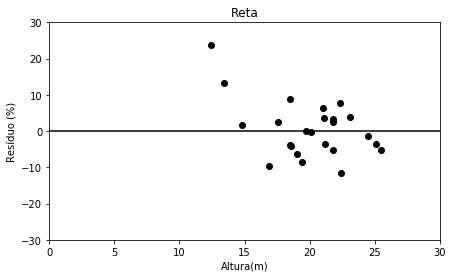

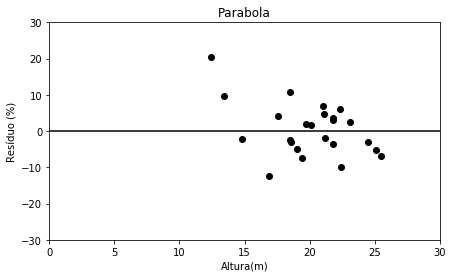

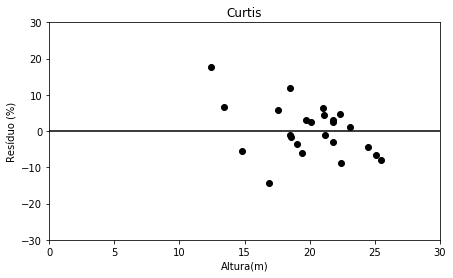

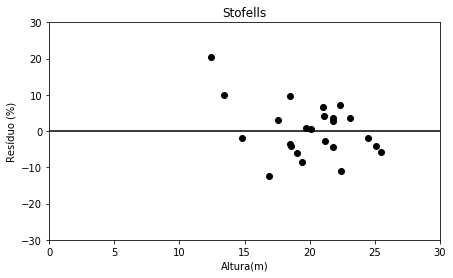

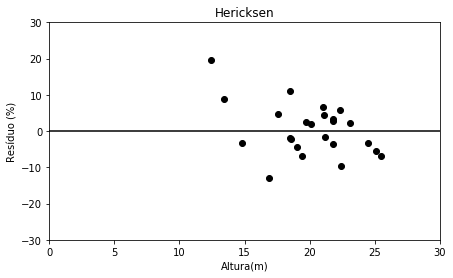

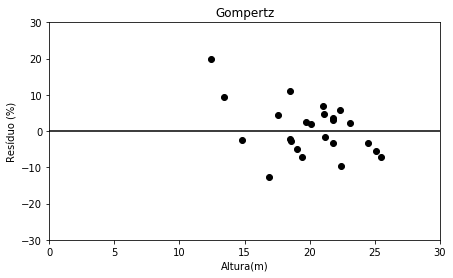

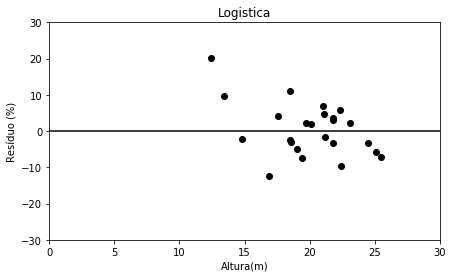

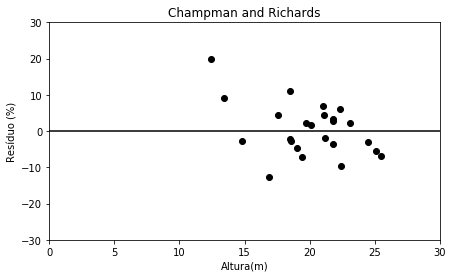

In [25]:
# Gráfico de resíduos

# função para gerar os gráficos de cada modelo
def grafico_resid(altura,residuo,modelo):
    plt.rcParams["figure.figsize"] = (7, 4)
    fig, ax = plt.subplots()
    ax.scatter(altura, residuo, c='black')
    ax.axhline(y=0.0, xmin=0.0, xmax=1, color='black')
    transform = ax.transAxes
    plt.xlim(0, 30)
    plt.ylim(-30, 30)
    plt.title(f'{modelo}')
    plt.xlabel('Altura(m)')
    plt.ylabel('Resíduo (%)')
    plt.savefig(f'{modelo}_residuos.png')
    
# gerando gráfico para cada modelo
grafico_resid(altura,resid_reta100,'Reta')
grafico_resid(altura,resid_parabola100,'Parabola')
grafico_resid(altura,resid_curtis100,'Curtis')
grafico_resid(altura,resid_stofells100,'Stofells')
grafico_resid(altura,resid_hericksen100,'Hericksen')
grafico_resid(altura,resid_gomp100,'Gompertz')
grafico_resid(altura,resid_log100,'Logistica')
grafico_resid(altura,resid_champ100,'Champman and Richards')

In [26]:
# Salvando as Predições, Estatística de qualidade e parametros do modelo tabelas em xlsx

dfs = {'Predição':tabela_estimado, 'Estatísticas':estatistica, 'Parametros':parametros}
writer = pd.ExcelWriter('Modelos_ajustados.xlsx', engine='xlsxwriter')
for sheet_name in dfs.keys():
    dfs[sheet_name].to_excel(writer, sheet_name=sheet_name, index=False)
    
writer.save()

In [27]:
# Informando a conclusão
print('Processo concluído com êxito, obrigado!')

Processo concluído com êxito, obrigado!
